In [17]:
#| hide
import fdtd_python.fdtd_python as fd
import numpy as np
import matplotlib.pyplot as plt
import pytmat
from refractiveindex import RefractiveIndexMaterial
from lmfit import Minimizer, Parameters, report_fit

# fdtd_python

> A python package to run fdtd simulations

## Developer Guide

If you are new to using `nbdev` here are some useful pointers to get you started.

### Install fdtd_python in Development mode

```sh
# make sure fdtd_python package is installed in development mode
$ pip install -e .

# make changes under nbs/ directory
# ...

# compile to have changes apply to fdtd_python
$ nbdev_prepare
```

## Usage

### Installation

Install latest from the GitHub [repository][repo]:

```sh
$ pip install git+https://github.com/gbeane66/fdtd_python.git
```

or from [conda][conda]

```sh
$ conda install -c gbeane66 fdtd_python
```

or from [pypi][pypi]


```sh
$ pip install fdtd_python
```


[repo]: https://github.com/gbeane66/fdtd_python
[docs]: https://gbeane66.github.io/fdtd_python/
[pypi]: https://pypi.org/project/fdtd_python/
[conda]: https://anaconda.org/gbeane66/fdtd_python

### Documentation

Documentation can be found hosted on this GitHub [repository][repo]'s [pages][docs]. Additionally you can find package manager specific guidelines on [conda][conda] and [pypi][pypi] respectively.

[repo]: https://github.com/gbeane66/fdtd_python
[docs]: https://gbeane66.github.io/fdtd_python/
[pypi]: https://pypi.org/project/fdtd_python/
[conda]: https://anaconda.org/gbeane66/fdtd_python

## How to use

Define the refractive index and thickness of the layers in the simulation. The refractive index is defined as a list of floats, and the thickness is defined as a list of floats. The length of the two lists must be equal.

```python
n = [1.5, 2.5]  # refractive index of the layers
d = [0.2, 500]  # thickness of the layers in micrometers
```

The fdtd settings class is used to define the simulation settings. The class takes the following parameters:
- `simulation_time`: The total time of the simulation in picoseconds.
- `simulation_size`: The size of the simulation in micrometers.
- `d`: The thickness of the layers in micrometers.
- `n`: The refractive index of the layers.


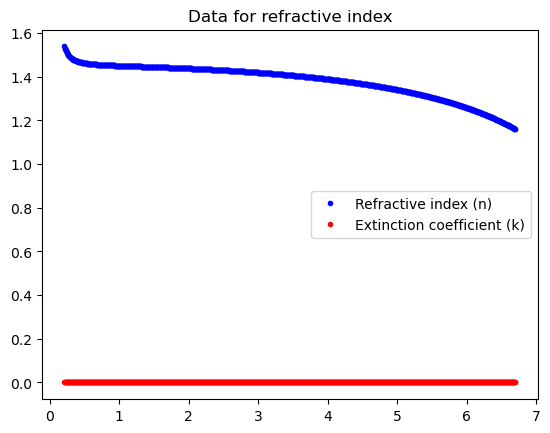

884.794133086552
521.6403272056166
512.2814587883413
201.51012952610643
[[Fit Statistics]]
    # fitting method   = L-BFGS-B
    # function evals   = 4032
    # data points      = 1000
    # variables        = 6
    chi-square         = 201.510130
    reduced chi-square = 0.20272649
    Akaike info crit   = -1589.91563
    Bayesian info crit = -1560.46910
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    eps_inf:    1 (fixed)
    eps_l_0:    19040.3339 (init = 9.52236)
    omega_0_0: -88.2634672 (init = 3.554072)
    delta_0:    0 (fixed)
    eps_l_1:   -3519.18718 (init = 4.930125)
    omega_0_1: -124.220584 (init = 1.588476)
    delta_1:    0 (fixed)
    eps_l_2:   -51168.0825 (init = 2.350213)
    omega_0_2:  43.0605665 (init = 9.689991)
   

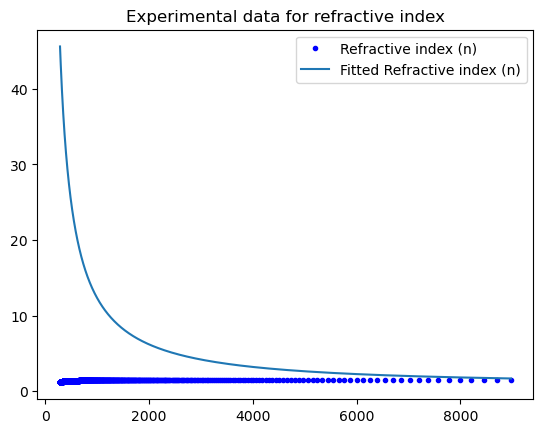

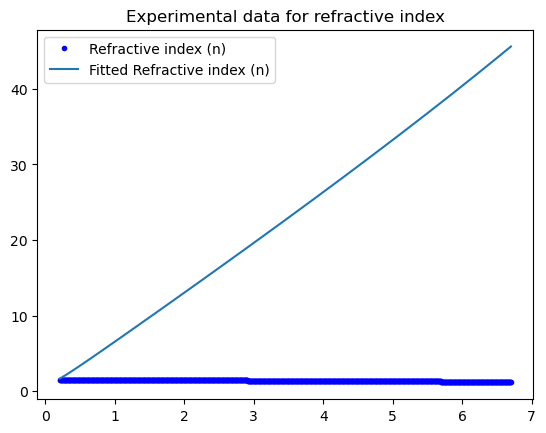

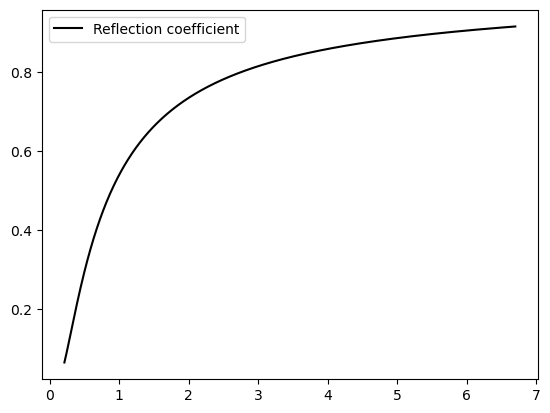

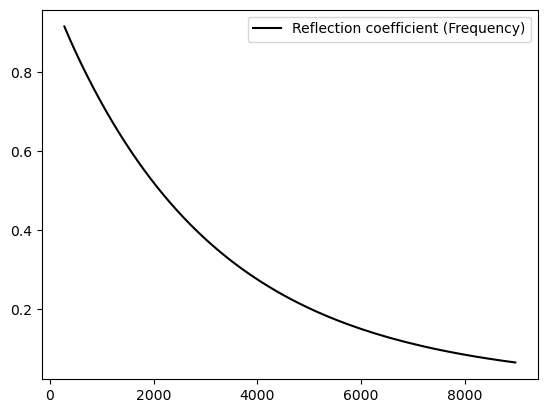

In [18]:
# Fitting code to obtain frequency dependent refractive index from experimental data

# Taking material data from refractiveindex.info
mat = RefractiveIndexMaterial(shelf="main",book="SiO2",page="Malitson") # SiO2
l_mat = mat.material.originalData['wavelength (um)']
n_mat_exp = mat.material.originalData['n']
omega_mat = 2*np.pi*300/l_mat
plt.figure()
plt.plot(l_mat,n_mat_exp.real,'b.',label="Refractive index (n)")
plt.plot(l_mat,n_mat_exp.imag,'r.',label="Extinction coefficient (k)")
plt.title("Data for refractive index")
plt.legend()
plt.show()

# Perfoming the fit


poles = 3

# This either gives a terrible fit or it has incompatible constraints with the update equations
coeffs = fd.fit_refractive_index(l_mat,n_mat_exp,poles)

print(coeffs)
B = coeffs[1::3]
C = coeffs[2::3]
D = coeffs[3::3]
n_from_coeffs = lambda lb: (coeffs[0] + np.sum(np.array([(B[i])/(1 + 1j*D[i]*(1/lb) - (C[i]**2)/(lb**2)) for i in range(1,len(B))]),axis=0))**0.5
print(coeffs)
plt.figure()
plt.plot(omega_mat,n_mat_exp.real,'b.',label="Refractive index (n)")
plt.plot(omega_mat,n_from_coeffs(l_mat).real,label="Fitted Refractive index (n)")
if not np.all(np.isreal(n_mat_exp)):
    plt.plot(omega_mat,n_mat_exp.imag,'r.',label="Extinction coefficient (k)")
    plt.plot(omega_mat,n_from_coeffs(l_mat).imag,label="Fitted Extinction coefficient (k)")
plt.title("Experimental data for refractive index")
plt.legend()
plt.show()

plt.figure()
plt.plot(l_mat,n_mat_exp.real,'b.',label="Refractive index (n)")
plt.plot(l_mat,n_from_coeffs(l_mat).real,label="Fitted Refractive index (n)")
if not np.all(np.isreal(n_mat_exp)):
    plt.plot(l_mat,n_mat_exp.imag,'r.',label="Extinction coefficient (k)")
    plt.plot(l_mat,n_from_coeffs(l_mat).imag,label="Fitted Extinction coefficient (k)")
plt.title("Experimental data for refractive index")
plt.legend()
plt.show()

fitted_mat = coeffs

plt.figure()
reflection_coeff = abs((1-(n_from_coeffs(l_mat)))/(1+(n_from_coeffs(l_mat))))**2
plt.plot(l_mat,reflection_coeff,'k',label="Reflection coefficient")
#plt.plot(l,1-reflection_coeff,'k',label="Transmission coefficient")
plt.legend()
plt.show()

plt.figure()
reflection_coeff = abs((1-(n_from_coeffs(l_mat)))/(1+(n_from_coeffs(l_mat))))**2
plt.plot(omega_mat,reflection_coeff,'k',label="Reflection coefficient (Frequency)")
#plt.plot(2*np.pi*300/l,1-reflection_coeff,'k',label="Transmission coefficient (Frequency)")
plt.legend()
plt.show()



c:\Users\smart\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


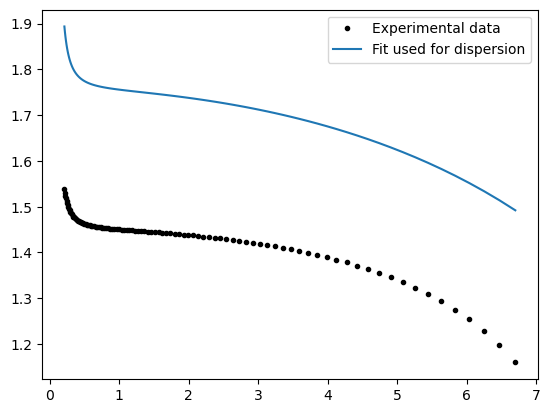

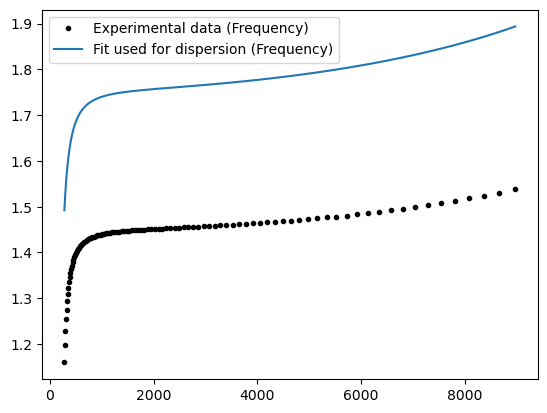

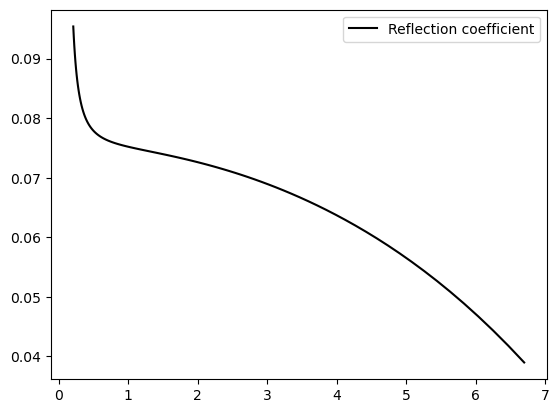

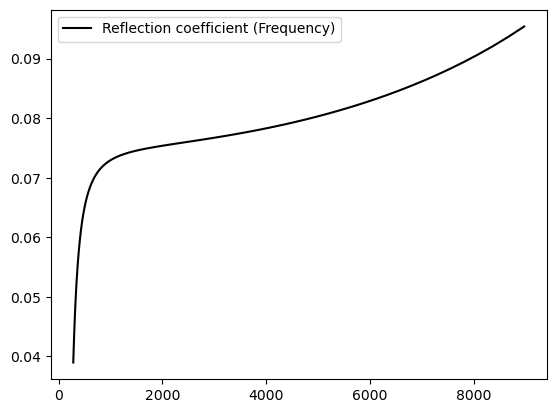

In [ ]:
data = np.genfromtxt("Malitson.csv", delimiter=",", skip_header=1)
l = data[:,0] # microns
n_exp = data[:,1]

# Sellmeier coefficients as taken from refractiveindex.info manually
# eps_inf-1, B, C, imaginary coeff of 0
SiO2 = [0, 0.6961663, 0.0684043, 0, 0.4079426, 0.1162414, 0, 0.8974794, 9.896161, 0]
AlO3 = [0, 1.4313493, 0.0726631, 0, 0.65054713, 0.1193242, 0, 5.3414021, 18.028251, 0]
n = [SiO2,AlO3]
B = np.array(n[0][1::3])
C = np.array(n[0][2::3])
D = np.array(n[0][3::3])
n_from_coeffs = lambda lb: (1 + np.sum(np.array([B[i]/(1 + (2*D[i]*C[i]/lb)*1j - (C[i]/lb)**2) for i in range(len(B))]),axis=0))**0.5
plt.figure()
plt.plot(l,n_exp,'k.',label="Experimental data")
plt.plot(l,n_from_coeffs(l),label="Fit used for dispersion")
plt.legend()
plt.show()

plt.figure()
plt.plot(2*np.pi*300/l,n_exp,'k.',label="Experimental data (Frequency)")
plt.plot(2*np.pi*300/l,n_from_coeffs(l),label="Fit used for dispersion (Frequency)")
plt.legend()
plt.show()

plt.figure()
reflection_coeff = abs((1-(n_from_coeffs(l)))/(1+(n_from_coeffs(l))))**2
plt.plot(l,reflection_coeff,'k',label="Reflection coefficient")
#plt.plot(l,1-reflection_coeff,'k',label="Transmission coefficient")
plt.legend()
plt.show()

plt.figure()
reflection_coeff = abs((1-(n_from_coeffs(l)))/(1+(n_from_coeffs(l))))**2
plt.plot(2*np.pi*300/l,reflection_coeff,'k',label="Reflection coefficient (Frequency)")
#plt.plot(2*np.pi*300/l,1-reflection_coeff,'k',label="Transmission coefficient (Frequency)")
plt.legend()
plt.show()



The simulation is then run using the function is then run using the function `fdtd_run`:

```python
wavelength = 600  # wavelength in micrometers
N_w = 100  # number of points per wavelength
settings = fd.fdtd_settings(2500., 16., d, n)
fd.fdtd_run(wavelength, N_w, settings)
```

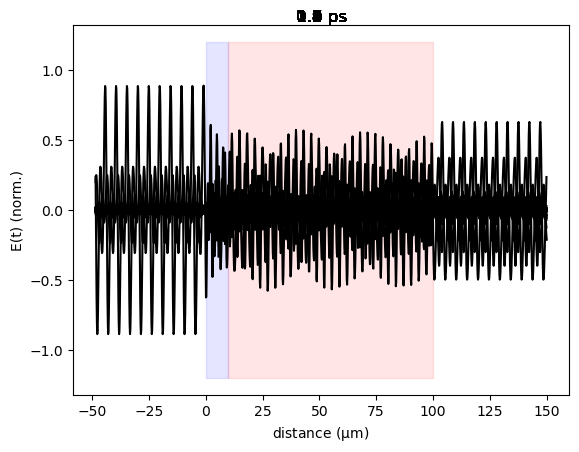

In [20]:
d = [10,90]
settings = fd.fdtd_settings(200.,1.6,d,n)

wavelength = 3.0
N_w =  20.
length_array, time_array, E_field = fd.fdtd_run(wavelength, N_w, settings)

In [21]:
# d = [15]
# settings = fd.fdtd_settings(200.,1.5,d,n)
# wavelength = 3.0
# N_w =  10
# length_array_ade, time_array_ade, E_field_ade = fd.fdtd_run_ade(wavelength, N_w, settings)

1.712205447936049
0.499875 0.15 300


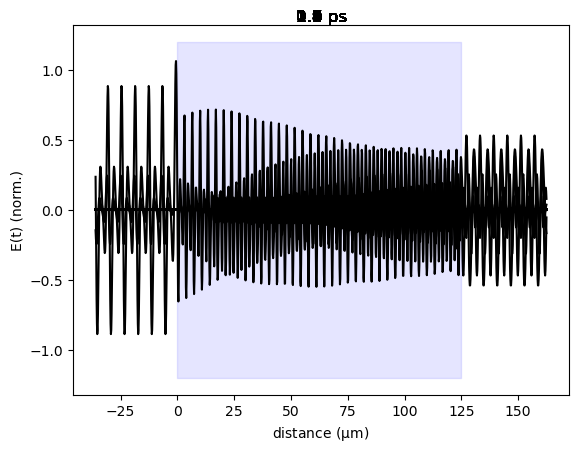

In [22]:
n_nd = [(1 + np.sum(B/(1 - (C/wavelength)**2)))]
print(n_nd[0]**0.5)
d = [125]
settings = fd.fdtd_settings(200.,2.0,d,n_nd)
length_array_nd, time_array_nd, E_field_nd = fd.fdtd_run_nd(wavelength, N_w, settings)

In [23]:
np.shape(E_field)

(1324, 3200)

#### Checking Fresnel reflectance and transmittance of the FDTD against the refractive index fit

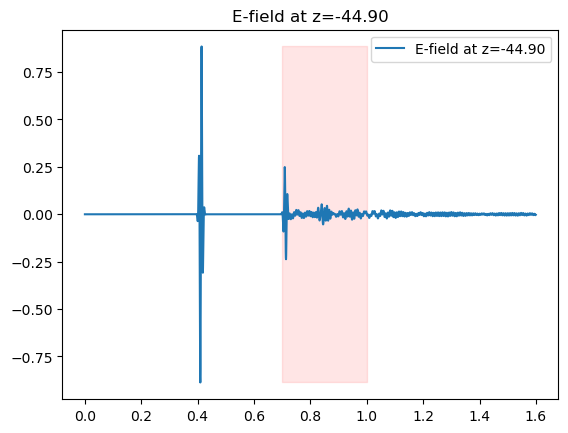

C:\Users\smart\AppData\Local\Temp\ipykernel_19344\3917792884.py:18: RuntimeWarning: divide by zero encountered in divide
  plt.plot(2*np.pi*300/freq,power)


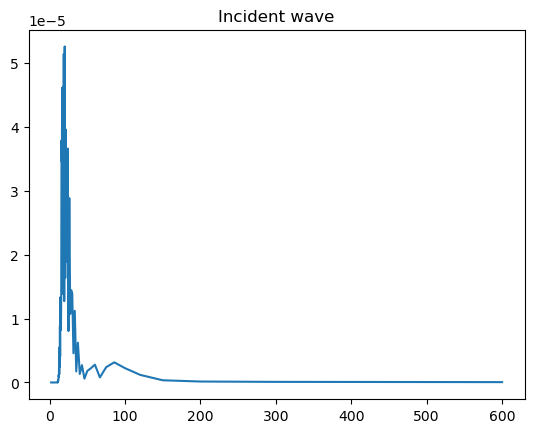

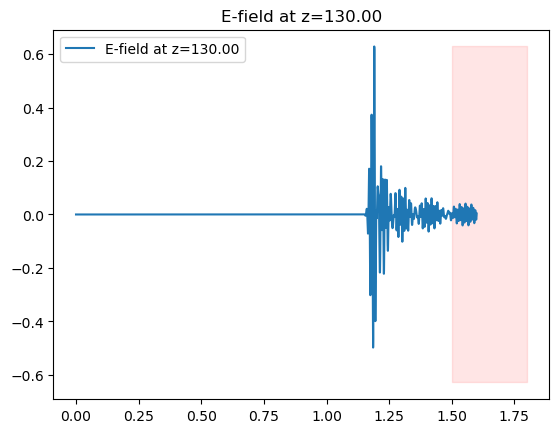

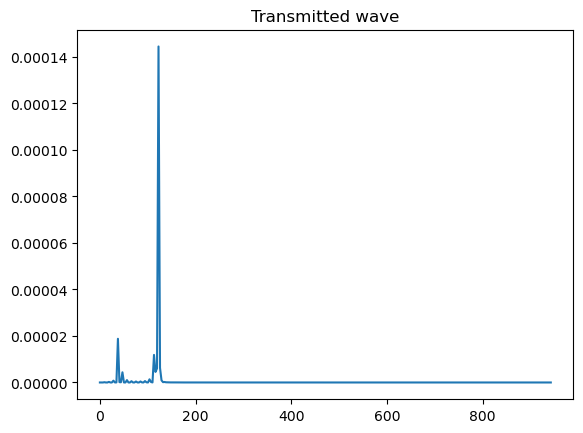

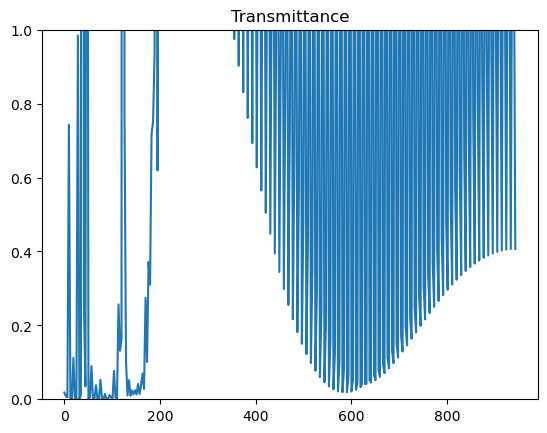

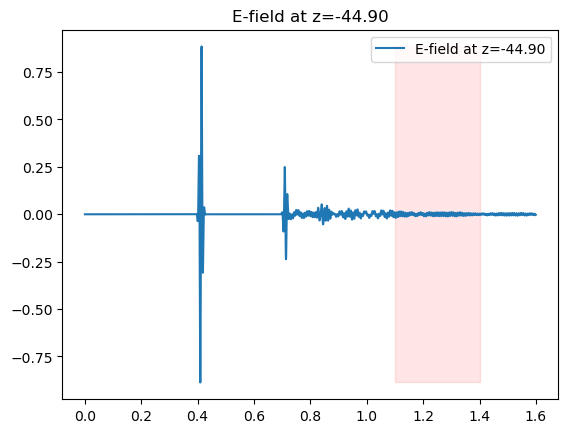

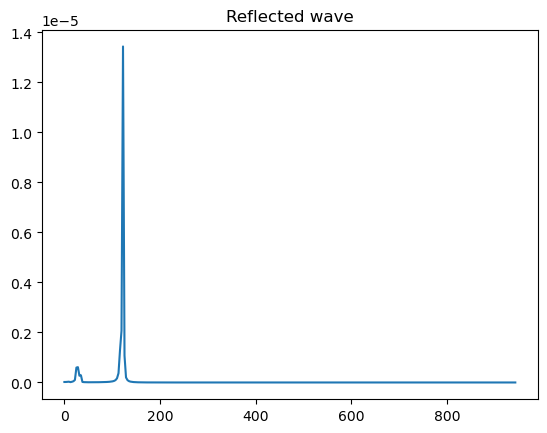

0.06895494476148452
0.9806774037158564
Ratio between fdtd reflectance of carrier wavelength vs expected from sellmeier 14.22
0.9310450552385154
10.545887106560688
Ratio between fdtd transmittance of carrier wavelength vs expected from sellmeier 11.33


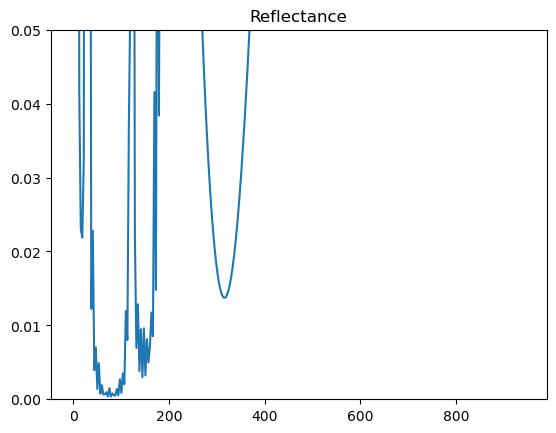

In [24]:
fig,ax = plt.subplots()
z_index = np.where(length_array>=-45)[0][0]
signal = E_field[z_index,:]
ax.plot(time_array, signal , label=f'E-field at z={length_array[z_index]:.2f}')
left_edge = 0.7
right_edge = 1.0
window = np.where((time_array > left_edge) & (time_array < right_edge))[0]
height = np.max(signal)
ax.fill_between((left_edge,right_edge),y1=height,y2=-height,alpha=0.1,color="red")
signal = signal[window] # Windowing the pulse to be fourier transformed
plt.title(f'E-field at z={length_array[z_index]:.2f}')
plt.legend()
plt.show()

fourier_transform = np.fft.rfft(signal,n=signal.size)/signal.size
freq = np.fft.rfftfreq(signal.size,d=1/(2*np.pi*300))
power = (abs(fourier_transform)**2)
plt.plot(2*np.pi*300/freq,power)
#plt.plot(np.array([3.0]*10),np.linspace(0,np.max(power)*1.2,10))
plt.title("Incident wave")
plt.show()


fig,ax = plt.subplots()
z_index_T = np.where(length_array>=130)[0][0]
signal_T = E_field[z_index_T,:]
left_edge = 1.5
right_edge = 1.8
window_T = np.where((time_array > left_edge) & (time_array < right_edge))[0]
height = np.max(signal_T)
ax.fill_between((left_edge,right_edge),y1=height,y2=-height,alpha=0.1,color="red")
ax.plot(time_array, signal_T, label=f'E-field at z={length_array[z_index_T]:.2f}')
signal_T = signal_T[window_T]
signal_T = np.resize(signal_T,signal.size)
plt.title(f'E-field at z={length_array[z_index_T]:.2f}')
plt.legend()
plt.show()


fourier_transform_T = np.fft.rfft(signal_T,n=signal_T.size)/signal_T.size
freq_T = np.fft.rfftfreq(signal_T.size,d=1/(2*np.pi*300))
norm_T = np.sum(abs(signal_T)**2)
power_T = (abs(fourier_transform_T)**2)
plt.plot(freq_T,power_T)
plt.title("Transmitted wave")
#plt.xlim((0,15))
plt.show()

transmittance = power_T/power
plt.plot(freq_T,transmittance)
plt.title("Transmittance")
plt.ylim((0,1))


fig,ax = plt.subplots()
z_index_R = np.where(length_array>=-45)[0][0]
signal_R = E_field[z_index_R,:]
left_edge = 1.1
right_edge = 1.4
window_R = np.where((time_array > left_edge) & (time_array < right_edge))[0]
height = np.max(signal_R)
ax.fill_between((left_edge,right_edge),y1=height,y2=-height,alpha=0.1,color="red")
ax.plot(time_array, signal_R, label=f'E-field at z={length_array[z_index_R]:.2f}')
signal_R = signal_R[window_R]
signal_R = np.resize(signal_R,signal.size)
plt.title(f'E-field at z={length_array[z_index_R]:.2f}')
plt.legend()
plt.show()


fourier_transform_R = np.fft.rfft(signal_R,n=signal_R.size)/signal_R.size
freq_R = np.fft.rfftfreq(signal_R.size,d=1/(2*np.pi*300))
norm_R = np.sum(abs(signal_R)**2)
power_R = (abs(fourier_transform_R)**2)
plt.plot(freq_R,power_R)
plt.title("Reflected wave")
#plt.xlim((0,15))
plt.show()

reflectance = power_R/power
plt.plot(freq_R,reflectance)
plt.title("Reflectance")
plt.ylim((0,0.05))


# Comparing reflectance of carrier frequencies
expected_reflectance = abs((1-(n_from_coeffs(wavelength)))/(1+(n_from_coeffs(wavelength))))**2
print(expected_reflectance)
fdtd_reflectance = reflectance[np.argmax(power_R)]
print(fdtd_reflectance)
print(f"Ratio between fdtd reflectance of carrier wavelength vs expected from sellmeier {fdtd_reflectance/expected_reflectance:.2f}")

expected_transmittance = 1 - expected_reflectance
print(expected_transmittance)
fdtd_transmittance = transmittance[np.argmax(power_T)]
print(fdtd_transmittance)
print(f"Ratio between fdtd transmittance of carrier wavelength vs expected from sellmeier {fdtd_transmittance/expected_transmittance:.2f}")
